## II. Programming and critical analysis
Use the Breast_cancer_dataset.csv dataset available at the course’s webpage and, using sklearn, apply a 5-fold stratified cross-validation with shuffling for the assessment of predictive models along this section.

1. Compare the performance of a 𝑘𝑁𝑁 with 𝑘 = 5 and a Naïve Bayes with Gaussian assumption:

    a. Compute the accuracies for each classifier. Which is more stable than the other regarding performance, and why?

In [50]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

dados = pd.read_csv('Breast_cancer_dataset.csv')
factors = dados.drop(['id', 'diagnosis'], axis=1)
factors_np = factors.to_numpy()                   # Needed because the stratified k fold uses numpy-like arrays
diagnosis = dados['diagnosis']


n_iterations = 100
randomized_seeds = random.sample(range(0, 1000000), n_iterations)
print("Seeds: " + str(randomized_seeds))

kNN_stds = []
GNB_stds = []

# Unimportant for exercise 1 a. but is useful for comparison in exercise 1 b.
kNN_non_scaled_stds = {}



for seed in randomized_seeds:

    strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

    model_kNN = KNeighborsClassifier(n_neighbors=5) 
    model_GNB = GaussianNB()

    acc_folds = {
        'kNN_train': [],
        'kNN_test': [],
        'GNB_train': [],
        'GNB_test': []
    }

    # For each fold we train both models and compare
    for i_train, i_test in strat_k_fold.split(factors_np, diagnosis):
        factors_train, factors_test = factors_np[i_train], factors_np[i_test]
        diagn_train, diagn_test = diagnosis[i_train], diagnosis[i_test]


        # kNN model with k=5
        model_kNN.fit(factors_train, diagn_train)
        diagn_train_predicted = model_kNN.predict(factors_train)
        diagn_test_predicted = model_kNN.predict(factors_test)

        acc_train = accuracy_score(diagn_train, diagn_train_predicted)
        acc_test = accuracy_score(diagn_test, diagn_test_predicted)
        acc_folds['kNN_train'].append(acc_train)
        acc_folds['kNN_test'].append(acc_test)


        # Gaussian Naive-Bayes model
        model_GNB.fit(factors_train, diagn_train)
        diagn_train_predicted = model_GNB.predict(factors_train)
        diagn_test_predicted = model_GNB.predict(factors_test)

        acc_train = accuracy_score(diagn_train, diagn_train_predicted)
        acc_test = accuracy_score(diagn_test, diagn_test_predicted)
        acc_folds['GNB_train'].append(acc_train)
        acc_folds['GNB_test'].append(acc_test)

    
    print("\nSeed: " + str(seed))
    for i in acc_folds.keys():
        acc_rounded = [ '%.3f' % j for j in acc_folds[i] ]
        print(i + "ing accuracies: " + str(acc_rounded))

        if 'test' in i:
            print()        # Just \n after each model's accuracies



    #kNN_train_stdeviation = np.std(acc_folds['kNN_train'])
    #GNB_train_stdeviation = np.std(acc_folds['GNB_train'])

    kNN_test_stdeviation = np.std(acc_folds['kNN_test'])
    GNB_test_stdeviation = np.std(acc_folds['GNB_test'])

    print("Standard Deviations:")
    #print("kNN training: " + str(kNN_train_stdeviation) +
         #"\nGNB training: " + str(GNB_train_stdeviation))

    print("\nkNN testing: " + str(kNN_test_stdeviation) +
         "\nGNB testing: " + str(GNB_test_stdeviation))
    
    
    kNN_stds.append(kNN_test_stdeviation)
    GNB_stds.append(GNB_test_stdeviation)
    
    kNN_non_scaled_stds[seed] = kNN_test_stdeviation     # Only important for 1 b.
    


print("\n\nAverage standard deviations:")
print("kNN: " + str(np.mean(kNN_stds)))
print("GNB: " + str(np.mean(GNB_stds)))
    




Seeds: [723450, 533593, 111634, 507758, 271032, 776366, 226040, 308186, 341807, 825516, 28764, 266088, 479942, 19794, 777115, 608056, 402551, 468159, 880497, 138335, 896986, 65151, 146299, 290641, 436253, 91172, 255821, 636719, 823908, 797448, 86063, 609165, 450058, 693061, 396165, 946971, 393384, 639269, 116309, 748117, 375535, 900630, 439879, 161144, 136686, 203958, 60225, 159143, 776424, 805852, 915563, 201100, 160880, 99615, 412762, 729476, 52095, 187114, 839493, 110552, 855356, 976735, 661938, 93986, 319067, 103551, 134733, 925693, 664454, 575015, 438538, 114697, 900533, 134903, 902720, 801702, 884530, 491095, 116748, 383992, 429001, 279498, 415211, 812407, 214370, 718997, 189674, 563899, 956165, 285428, 712353, 272464, 998796, 582892, 710710, 628996, 352792, 53432, 49900, 984771]

Seed: 723450
kNN_training accuracies: ['0.943', '0.941', '0.941', '0.949', '0.950']
kNN_testing accuracies: ['0.947', '0.947', '0.930', '0.930', '0.929']

GNB_training accuracies: ['0.945', '0.934', '0.


Seed: 146299
kNN_training accuracies: ['0.954', '0.952', '0.941', '0.949', '0.945']
kNN_testing accuracies: ['0.877', '0.930', '0.956', '0.921', '0.956']

GNB_training accuracies: ['0.943', '0.947', '0.941', '0.941', '0.939']
GNB_testing accuracies: ['0.947', '0.912', '0.947', '0.947', '0.938']

Standard Deviations:

kNN testing: 0.028965539340088546
GNB testing: 0.013591153414585305

Seed: 290641
kNN_training accuracies: ['0.941', '0.941', '0.947', '0.949', '0.956']
kNN_testing accuracies: ['0.965', '0.939', '0.939', '0.912', '0.876']

GNB_training accuracies: ['0.936', '0.945', '0.938', '0.938', '0.947']
GNB_testing accuracies: ['0.956', '0.921', '0.930', '0.965', '0.938']

Standard Deviations:

kNN testing: 0.030030222377973658
GNB testing: 0.016294377317989807

Seed: 436253
kNN_training accuracies: ['0.949', '0.943', '0.952', '0.941', '0.950']
kNN_testing accuracies: ['0.921', '0.965', '0.921', '0.956', '0.929']

GNB_training accuracies: ['0.943', '0.936', '0.945', '0.936', '0.950


Seed: 915563
kNN_training accuracies: ['0.949', '0.952', '0.952', '0.936', '0.943']
kNN_testing accuracies: ['0.912', '0.930', '0.904', '0.956', '0.938']

GNB_training accuracies: ['0.943', '0.938', '0.945', '0.941', '0.943']
GNB_testing accuracies: ['0.947', '0.956', '0.921', '0.921', '0.956']

Standard Deviations:

kNN testing: 0.018671809313626546
GNB testing: 0.016003555630799002

Seed: 201100
kNN_training accuracies: ['0.941', '0.941', '0.958', '0.954', '0.943']
kNN_testing accuracies: ['0.939', '0.965', '0.904', '0.921', '0.929']

GNB_training accuracies: ['0.941', '0.934', '0.943', '0.947', '0.939']
GNB_testing accuracies: ['0.947', '0.965', '0.939', '0.939', '0.912']

Standard Deviations:

kNN testing: 0.020320730959454338
GNB testing: 0.017266508043422897

Seed: 160880
kNN_training accuracies: ['0.936', '0.960', '0.952', '0.943', '0.943']
kNN_testing accuracies: ['0.974', '0.904', '0.930', '0.939', '0.938']

GNB_training accuracies: ['0.938', '0.941', '0.943', '0.938', '0.945


Seed: 900533
kNN_training accuracies: ['0.952', '0.934', '0.952', '0.947', '0.958']
kNN_testing accuracies: ['0.939', '0.956', '0.904', '0.930', '0.876']

GNB_training accuracies: ['0.945', '0.927', '0.941', '0.949', '0.950']
GNB_testing accuracies: ['0.956', '0.974', '0.956', '0.904', '0.903']

Standard Deviations:

kNN testing: 0.02808421189435229
GNB testing: 0.029561882947291788

Seed: 134903
kNN_training accuracies: ['0.943', '0.938', '0.945', '0.956', '0.952']
kNN_testing accuracies: ['0.956', '0.930', '0.921', '0.930', '0.912']

GNB_training accuracies: ['0.938', '0.936', '0.949', '0.936', '0.945']
GNB_testing accuracies: ['0.956', '0.947', '0.930', '0.956', '0.912']

Standard Deviations:

kNN testing: 0.014865896631089186
GNB testing: 0.01726650804342289

Seed: 902720
kNN_training accuracies: ['0.941', '0.956', '0.945', '0.952', '0.939']
kNN_testing accuracies: ['0.956', '0.904', '0.965', '0.895', '0.947']

GNB_training accuracies: ['0.941', '0.949', '0.932', '0.945', '0.941']


Seed: 710710
kNN_training accuracies: ['0.949', '0.947', '0.945', '0.947', '0.947']
kNN_testing accuracies: ['0.939', '0.930', '0.939', '0.921', '0.912']

GNB_training accuracies: ['0.945', '0.947', '0.947', '0.943', '0.941']
GNB_testing accuracies: ['0.939', '0.921', '0.930', '0.939', '0.956']

Standard Deviations:

kNN testing: 0.010471236926654746
GNB testing: 0.011508876248377273

Seed: 628996
kNN_training accuracies: ['0.949', '0.947', '0.943', '0.945', '0.941']
kNN_testing accuracies: ['0.912', '0.930', '0.947', '0.947', '0.938']

GNB_training accuracies: ['0.958', '0.936', '0.938', '0.938', '0.941']
GNB_testing accuracies: ['0.904', '0.956', '0.947', '0.939', '0.938']

Standard Deviations:

kNN testing: 0.013101347739906507
GNB testing: 0.01788195758603928

Seed: 352792
kNN_training accuracies: ['0.947', '0.943', '0.947', '0.947', '0.947']
kNN_testing accuracies: ['0.939', '0.930', '0.930', '0.912', '0.938']

GNB_training accuracies: ['0.945', '0.947', '0.936', '0.943', '0.945'

Initially, it was computed the accuracies for both classifiers across 5 folds. To measure the stability of each classifier we could use the standard deviation for those 5 accuracies and see which model has more varying accuracies. At first, it seemed that the Naive-Bayes with Gaussian assumption was the most stable model since its standard deviation was lower. However, after running the code a couple more times the standard deviations of both models were oscillating and in a lot of instances they were very similar.

Therefore, we decided to run the code across multiple iterations and in the end calculate the average standard deviations for each model. We decided against using a fixed seed since, even though they're good for reproducibility of results, we would just be analyzing a specific splitting of our dataset and not a general case.

With this in mind, we made our code choose 100 different random seeds (between 0 and 1 million, though numerical proximity of seeds doesn't affect their similarity) and calculate the accuracies and standard deviations for each different split. In the end, we calculate the mean of each model's standard deviation for the testing accuracies.

Only the testing accuracies matter in terms of model generalization, and therefore in comparability to other models, the training accuracies were just calculated to check the model's internal performance.

After a couple of runs, we can only conclude that both the k Nearest Neighbor model with k=5 and the Naive-Bayes with Gaussian assumption model are similar in terms of stability.

b. Provide the accuracy of the kNN model, this time preprocessing the data with a Min-Max scaler before training the model. Explain the impact that this step has on the performance of the model, providing an explanation for the results.

In [51]:
# Make sure to run the code from a.'s cell first

# Normalization of data
scaler = MinMaxScaler()
factors_scaled = scaler.fit_transform(factors)    # All features are numeric


# We'll use the same seeds that resulted from a. so we can compare results
print("Seeds: " + str(randomized_seeds))

kNN_stds = []
GNB_stds = []

for seed in randomized_seeds:

    strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

    model_kNN = KNeighborsClassifier(n_neighbors=5) 
    model_GNB = GaussianNB()

    acc_folds = {
        #'kNN_train': [],
        'kNN_test': [],
        #'GNB_train': [],
        'GNB_test': []
    }

    # For each fold we train both models and compare
    for i_train, i_test in strat_k_fold.split(factors_scaled, diagnosis):
        factors_train, factors_test = factors_scaled[i_train], factors_scaled[i_test]
        diagn_train, diagn_test = diagnosis[i_train], diagnosis[i_test]


        # kNN model with k=5
        model_kNN.fit(factors_train, diagn_train)
        diagn_train_predicted = model_kNN.predict(factors_train)
        diagn_test_predicted = model_kNN.predict(factors_test)

        acc_train = accuracy_score(diagn_train, diagn_train_predicted)
        acc_test = accuracy_score(diagn_test, diagn_test_predicted)
        #acc_folds['kNN_train'].append(acc_train)
        acc_folds['kNN_test'].append(acc_test)


        # Gaussian Naive-Bayes model
        model_GNB.fit(factors_train, diagn_train)
        diagn_train_predicted = model_GNB.predict(factors_train)
        diagn_test_predicted = model_GNB.predict(factors_test)

        acc_train = accuracy_score(diagn_train, diagn_train_predicted)
        acc_test = accuracy_score(diagn_test, diagn_test_predicted)
        #acc_folds['GNB_train'].append(acc_train)
        acc_folds['GNB_test'].append(acc_test)

    
    print("\nSeed: " + str(seed))
    for i in acc_folds.keys():
        acc_rounded = [ '%.3f' % j for j in acc_folds[i] ]
        print(i + "ing accuracies: " + str(acc_rounded))

        if 'test' in i:
            print()        # Just \n after each model's accuracies



    #kNN_train_stdeviation = np.std(acc_folds['kNN_train'])
    #GNB_train_stdeviation = np.std(acc_folds['GNB_train'])

    kNN_test_stdeviation = np.std(acc_folds['kNN_test'])
    GNB_test_stdeviation = np.std(acc_folds['GNB_test'])

    print("Standard Deviations:")
    #print("kNN training: " + str(kNN_train_stdeviation) +
         #"\nGNB training: " + str(GNB_train_stdeviation))

    print("\nkNN non scaled testing: " + str(kNN_non_scaled_stds[seed]) +
          "\nkNN testing: " + str(kNN_test_stdeviation) +
         "\nGNB testing: " + str(GNB_test_stdeviation))
    
    
    kNN_stds.append(kNN_test_stdeviation)
    GNB_stds.append(GNB_test_stdeviation)
    


print("\n\nAverage standard deviations:")
print("kNN: " + str(np.mean(kNN_stds)))
print("GNB: " + str(np.mean(GNB_stds)))
    


    
    
    

Seeds: [723450, 533593, 111634, 507758, 271032, 776366, 226040, 308186, 341807, 825516, 28764, 266088, 479942, 19794, 777115, 608056, 402551, 468159, 880497, 138335, 896986, 65151, 146299, 290641, 436253, 91172, 255821, 636719, 823908, 797448, 86063, 609165, 450058, 693061, 396165, 946971, 393384, 639269, 116309, 748117, 375535, 900630, 439879, 161144, 136686, 203958, 60225, 159143, 776424, 805852, 915563, 201100, 160880, 99615, 412762, 729476, 52095, 187114, 839493, 110552, 855356, 976735, 661938, 93986, 319067, 103551, 134733, 925693, 664454, 575015, 438538, 114697, 900533, 134903, 902720, 801702, 884530, 491095, 116748, 383992, 429001, 279498, 415211, 812407, 214370, 718997, 189674, 563899, 956165, 285428, 712353, 272464, 998796, 582892, 710710, 628996, 352792, 53432, 49900, 984771]

Seed: 723450
kNN_testing accuracies: ['0.982', '0.982', '0.965', '0.965', '0.938']

GNB_testing accuracies: ['0.930', '0.956', '0.939', '0.904', '0.929']

Standard Deviations:

kNN non scaled testing: 0


Seed: 797448
kNN_testing accuracies: ['0.974', '0.956', '0.965', '0.982', '0.956']

GNB_testing accuracies: ['0.965', '0.930', '0.895', '0.956', '0.929']

Standard Deviations:

kNN non scaled testing: 0.030704422660782694
kNN testing: 0.010310477943663948
GNB testing: 0.024589259098698954

Seed: 86063
kNN_testing accuracies: ['0.965', '0.956', '0.956', '0.974', '0.982']

GNB_testing accuracies: ['0.921', '0.912', '0.939', '0.965', '0.947']

Standard Deviations:

kNN non scaled testing: 0.010599635013306644
kNN testing: 0.010181889812786827
GNB testing: 0.018680224364397795

Seed: 609165
kNN_testing accuracies: ['0.982', '0.974', '0.982', '0.947', '0.965']

GNB_testing accuracies: ['0.912', '0.947', '0.956', '0.904', '0.929']

Standard Deviations:

kNN non scaled testing: 0.015627595019989542
kNN testing: 0.013154081496490999
GNB testing: 0.02000462000771587

Seed: 450058
kNN_testing accuracies: ['0.974', '0.947', '0.974', '0.982', '0.982']

GNB_testing accuracies: ['0.939', '0.912', '


Seed: 110552
kNN_testing accuracies: ['0.956', '0.965', '1.000', '0.974', '0.947']

GNB_testing accuracies: ['0.947', '0.930', '0.956', '0.930', '0.938']

Standard Deviations:

kNN non scaled testing: 0.03814135627948189
kNN testing: 0.01817171383592557
GNB testing: 0.01025066618413361

Seed: 855356
kNN_testing accuracies: ['0.947', '0.974', '0.991', '0.956', '0.965']

GNB_testing accuracies: ['0.921', '0.912', '0.939', '0.956', '0.912']

Standard Deviations:

kNN non scaled testing: 0.02035287499544502
kNN testing: 0.01509952706041795
GNB testing: 0.01715572818643993

Seed: 976735
kNN_testing accuracies: ['0.956', '0.956', '0.982', '0.982', '0.965']

GNB_testing accuracies: ['0.930', '0.921', '0.921', '0.930', '0.965']

Standard Deviations:

kNN non scaled testing: 0.025734020808907423
kNN testing: 0.011917770620739737
GNB testing: 0.016148994239421472

Seed: 661938
kNN_testing accuracies: ['0.947', '0.947', '0.965', '0.982', '0.982']

GNB_testing accuracies: ['0.904', '0.904', '0.94


Seed: 285428
kNN_testing accuracies: ['0.982', '0.965', '0.982', '0.965', '0.938']

GNB_testing accuracies: ['0.974', '0.956', '0.939', '0.930', '0.876']

Standard Deviations:

kNN non scaled testing: 0.01073581795810324
kNN testing: 0.016269283897039452
GNB testing: 0.03301968735936183

Seed: 712353
kNN_testing accuracies: ['0.939', '0.965', '0.974', '0.991', '0.965']

GNB_testing accuracies: ['0.904', '0.930', '0.930', '0.965', '0.929']

Standard Deviations:

kNN non scaled testing: 0.011621195602924395
kNN testing: 0.017016260450695885
GNB testing: 0.01954874434810875

Seed: 272464
kNN_testing accuracies: ['0.956', '0.982', '0.965', '0.982', '0.965']

GNB_testing accuracies: ['0.921', '0.912', '0.921', '0.965', '0.920']

Standard Deviations:

kNN non scaled testing: 0.022929618794599666
kNN testing: 0.010558051796553312
GNB testing: 0.01878606961269921

Seed: 998796
kNN_testing accuracies: ['0.982', '0.965', '0.939', '0.982', '0.973']

GNB_testing accuracies: ['0.921', '0.904', '0.

Like described in 1 a., each time the cell runs, 100 iterations are executed. Naturally, we're using the same seeds that the execution of 1 a. chose so we can compare the performance of the kNN model when its training data is scaled and non scaled.

Even though there do exist some interations where the performance is similar, the performance of the scaled kNN model is usually higher than that of the non scaled one. This is expected and shows us why it's important to normalize our data if we're going to use this model.

If the kNN model is trained on data that was not correctly preprocessed, there might be a bias towards features with a higher range, i.e features with a higher maximum value will have a bigger impact on the model than those with a smaller maximum value. This happens due to kNN's nature being based on calculating distances.

   c. Using scipy, determine whether the scaled 𝑘𝑁𝑁 model is statistically superior to Naïve Bayes (also scaled) when it comes to accuracy, and justify your result.

In [49]:
# Make sure b's cell was the last to run

from scipy.stats import ttest_rel

# See if kNN better than GNB, true if p_value < 0.05 
t_test_greater = ttest_rel(acc_folds['kNN_test'], acc_folds['GNB_test'], alternative='greater')
# See if kNN worse than GNB, true if p_value < 0.05
t_test_less = ttest_rel(acc_folds['kNN_test'], acc_folds['GNB_test'], alternative='less')

print("p_values: ")
print("kNN better than GNB? " + str(t_test_greater.pvalue))
print("kNN worse than GNB? " + str(t_test_less.pvalue))

p_values: 
kNN better than GNB? 0.0009288398117784357
kNN worse than GNB? 0.9990711601882215


Using a Student's t-test we can check which model is statistically superior. Since the p-value of the "kNN is better" hypothesis is less than 0.05 we can conclude that kNN's performance when scaled is significantly higher than that of the Gaussian Naive-Bayes model (also scaled).

(Might be important to note that the accuracy values being used to calculate these p_values are those of the last seed used in 1 b. However, across different executions where that last seed changes, the p-value is still <0.05 and the scaled kNN remains the better model. This is also evident by comparing the average standard deviations for the accuracies after 100 seeds, present at the end of 1. b's output, where the scaled kNN's is always lower than the scaled Gaussian Naive-Bayes model.) 

2. Using a 70-30 train-test split, vary the number of neighbors of a 𝑘𝑁𝑁 classifier using 𝑘 = {1, 5, 10, 15, 20, 25}. Additionally, for each 𝑘, train one classifier using uniform weights and distance weights.
    
    a. Plot the train and test accuracies for each model.

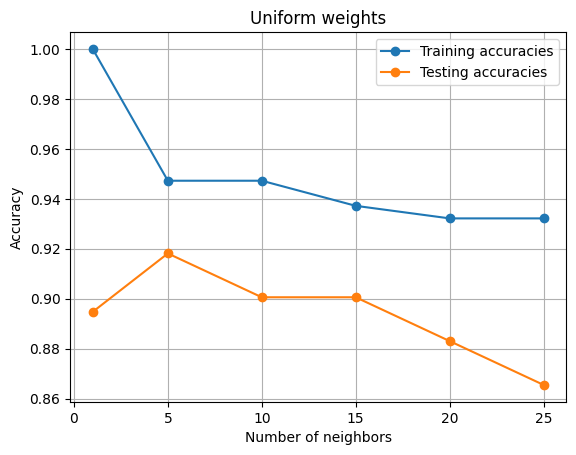

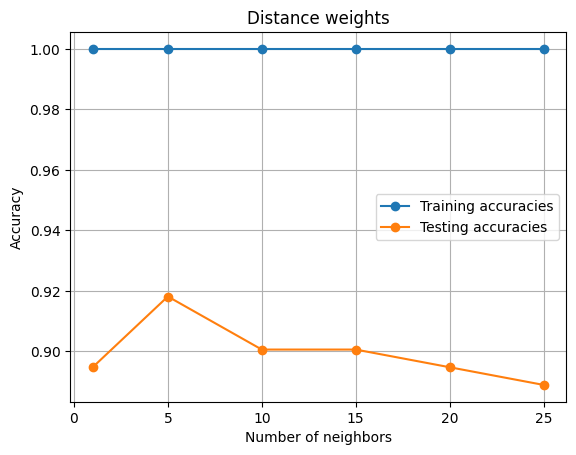

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


dados = pd.read_csv('Breast_cancer_dataset.csv')
factors = dados.drop(['id', 'diagnosis'], axis=1)
diagnosis = dados['diagnosis']


factors_train, factors_test, diagn_train, diagn_test = train_test_split(factors, diagnosis, train_size=0.7)

neighbors = [1, 5, 10, 15, 20, 25]


acc = {
    'unif_train': [],
    'unif_test': [],
    'dist_train': [],
    'dist_test': []
}


for k in neighbors:
    # Create and train both models, one with uniform weights, the other with distance weights 
    uniform_kNN = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    distance_kNN = KNeighborsClassifier(n_neighbors=k, weights='distance')

    uniform_kNN.fit(factors_train, diagn_train)
    distance_kNN.fit(factors_train, diagn_train)


    # Predict diagnosis for the uniform weights model and calculate training and testing accuracies
    diagn_train_predicted = uniform_kNN.predict(factors_train)
    diagn_test_predicted = uniform_kNN.predict(factors_test)
    acc_train = accuracy_score(diagn_train, diagn_train_predicted)
    acc_test = accuracy_score(diagn_test, diagn_test_predicted)

    acc['unif_train'].append(acc_train)
    acc['unif_test'].append(acc_test)


    # Predict diagnosis for the distance weights model and calculate training and testing accuracies
    diagn_train_predicted = distance_kNN.predict(factors_train)
    diagn_test_predicted = distance_kNN.predict(factors_test)
    acc_train = accuracy_score(diagn_train, diagn_train_predicted)
    acc_test = accuracy_score(diagn_test, diagn_test_predicted)

    acc['dist_train'].append(acc_train)
    acc['dist_test'].append(acc_test)

    
    

    
plt.figure()
plt.plot(neighbors, acc['unif_train'], label="Training accuracies", marker='o')
plt.plot(neighbors, acc['unif_test'], label="Testing accuracies", marker='o')
plt.title("Uniform weights")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.grid(True)


plt.figure()
plt.plot(neighbors, acc['dist_train'], label="Training accuracies", marker='o')
plt.plot(neighbors, acc['dist_test'], label="Testing accuracies", marker='o')
plt.title("Distance weights")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.grid(True)




plt.show()
    


b. Explain the impact of increasing the number of neighbors on the
generalization ability of the models. Elaborate on the trade-offs between small and
large values of k and suggest its optimal value.

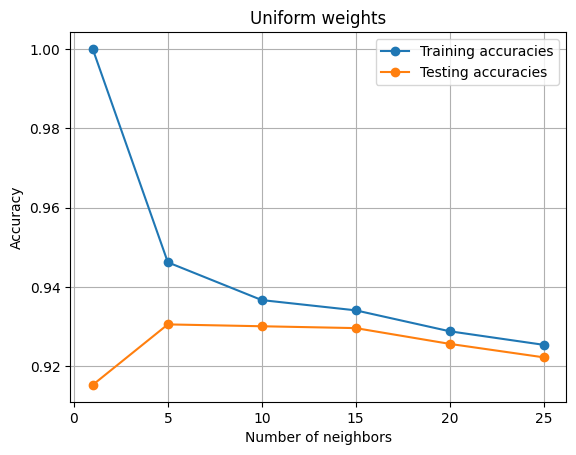

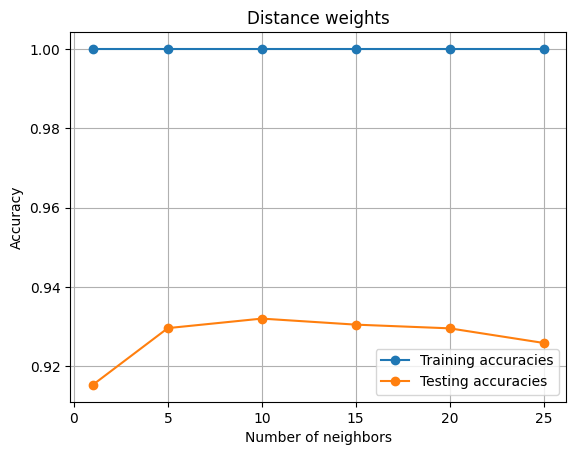

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


dados = pd.read_csv('Breast_cancer_dataset.csv')
factors = dados.drop(['id', 'diagnosis'], axis=1)
diagnosis = dados['diagnosis']


#factors_train, factors_test, diagn_train, diagn_test = train_test_split(factors, diagnosis, train_size=0.7)

neighbors = [1, 5, 10, 15, 20, 25]

several_accuracies = []
accuracies_means = {
        'unif_train': [0, 0, 0, 0, 0, 0],
        'unif_test': [0, 0, 0, 0, 0, 0],
        'dist_train': [0, 0, 0, 0, 0, 0],
        'dist_test': [0, 0, 0, 0, 0, 0]
    }

iterations = 100


for i in range(iterations):
    factors_train, factors_test, diagn_train, diagn_test = train_test_split(factors, diagnosis, train_size=0.7)
    
    acc = {
        'unif_train': [],
        'unif_test': [],
        'dist_train': [],
        'dist_test': []
    }


    for k in neighbors:
        # Create and train both models, one with uniform weights, the other with distance weights 
        uniform_kNN = KNeighborsClassifier(n_neighbors=k, weights='uniform')
        distance_kNN = KNeighborsClassifier(n_neighbors=k, weights='distance')

        uniform_kNN.fit(factors_train, diagn_train)
        distance_kNN.fit(factors_train, diagn_train)


        # Predict diagnosis for the uniform weights model and calculate training and testing accuracies
        diagn_train_predicted = uniform_kNN.predict(factors_train)
        diagn_test_predicted = uniform_kNN.predict(factors_test)
        acc_train = accuracy_score(diagn_train, diagn_train_predicted)
        acc_test = accuracy_score(diagn_test, diagn_test_predicted)

        acc['unif_train'].append(acc_train)
        acc['unif_test'].append(acc_test)


        # Predict diagnosis for the distance weights model and calculate training and testing accuracies
        diagn_train_predicted = distance_kNN.predict(factors_train)
        diagn_test_predicted = distance_kNN.predict(factors_test)
        acc_train = accuracy_score(diagn_train, diagn_train_predicted)
        acc_test = accuracy_score(diagn_test, diagn_test_predicted)

        acc['dist_train'].append(acc_train)
        acc['dist_test'].append(acc_test)

    
    
    several_accuracies.append(acc)
    
    
    for j in range(len(neighbors)):
        accuracies_means['unif_train'][j] += acc['unif_train'][j]
        accuracies_means['unif_test'][j] += acc['unif_test'][j]
        accuracies_means['dist_train'][j] += acc['dist_train'][j]
        accuracies_means['dist_test'][j] += acc['dist_test'][j]
        
        

for j in range(len(neighbors)):
    accuracies_means['unif_train'][j] /= iterations
    accuracies_means['unif_test'][j] /= iterations
    accuracies_means['dist_train'][j] /= iterations
    accuracies_means['dist_test'][j] /= iterations

#print(accuracies_means)

    
plt.figure()
plt.plot(neighbors, accuracies_means['unif_train'], label="Training accuracies", marker='o')
plt.plot(neighbors, accuracies_means['unif_test'], label="Testing accuracies", marker='o')
#plt.plot(neighbors, acc['unif_train'], label="Training accuracies", marker='o')
#plt.plot(neighbors, acc['unif_test'], label="Testing accuracies", marker='o')
plt.title("Uniform weights")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.grid(True)


plt.figure()
plt.plot(neighbors, accuracies_means['dist_train'], label="Training accuracies", marker='o')
plt.plot(neighbors, accuracies_means['dist_test'], label="Testing accuracies", marker='o')
#plt.plot(neighbors, acc['dist_train'], label="Training accuracies", marker='o')
#plt.plot(neighbors, acc['dist_test'], label="Testing accuracies", marker='o')
plt.title("Distance weights")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.grid(True)




plt.show()
    


Initially, we just trained both models and plotted the graphs, like shown in a. but, just like in exercise 1., the training and testing accuracies for each model would change with different executions of the cell, making it hard to draw a clear conclusion from it. This, of course, is due to the splitting of training and testing data being different for different iterations. However, fixing a specific seed for the stratified split could lead us to a biased or even wrong conclusion since we'd be analyzing only a specific situation, not the general case.

Therefore, 100 iterations of the original code are done for each execution of the cell. In each iteration, we split the data, train the models and calculate their predictions and respective training and testing accuracies. We also calculate the average accuracy for each value of k as we go through our 100 iterations. This gives us much more consistent graphs across different cell's executions.

By analyzing the graphs we can see that, for both models, their generalization ability (revealed by their testing accuracies) starts lower, for k=1, and then increases as k also increases. However, when k reaches 20, or even 15, the generalization ability starts to slightly decrease, ending lower for k=25.

With lower k values the model is, clearly, more prone to overfitting, with high training accuracies but a lower testing accuracies. This happens because the model is more sensitive to noise and is only focusing on the closest neighbors. On the other side, with higher k values, the model is less influenced by local patterns and will focus more on global distributions of data.  

Knowing this, we can conclude that the models' generalization ability is worst when there is only 1 neighbor and the optimal values are around 5 and 10, since after that not only do the testing accuracies decrease but for the uniform weights model the training accuracies also greatly decrease with the increase of neighbors.


3. Suppose you must deploy either kNN or Naïve Bayes in a clinical setting for breast cancer diagnosis. Discuss at least two factors that would influence your choice, referencing insights from your experiments. Comment on the models’ performance with medical datasets and the overall models’ characteristics from a more technical context (e.g., interpretability, computational cost, or scalability).

In a clinical setting to diagnose real patients it is very important to choose the right model for the situation in order to not waste any resources with misdiagnosis nor overlook a potential patient that needs medical care.

One of the most decisive factors that'd influence the choice between a kNN or a Naive Bayes is the size of the dataset that we have. This is because we need to first preprocess the data by normalizing all its numerical features in order for the kNN model to perform significantly better than the Naive Bayes. If the dataset is too large, the normalization process could be very costly and, not only that, if we were to get new data to improve the model we would need to re-normalize the whole dataset. Therefore, since the Naive Bayes model doesn't require the data to be correctly scaled, it could be a better choice over kNN, being computationally cheaper as well as more scalable.

On top of that, the interpretability of results with Naive Bayes is simpler and easier to communicate to physicians and other medical staff, due to its clear probabilistic structure, as opposed to kNN that depends on nearest neighbours.

There is, however, a really strong argument in favor of kNN which is that it is non-linear, unlike Naive Bayes. Since kNN does not assume that the features are conditionally independent it can identify complex patterns with features that are correlated, like often happens with real life and in breast cancer diagnosis. This is very important as it would lead to a much better generalization ability and therefore more successful predictions of diagnosis.

Considering that we're talking about a real life scenario, we would probably have a large dataset available and as science and medicine advance it would be important to keep updating said dataset with more and better data. If we only had a small or medium dataset and also had a good amount of computational power available, the kNN model would definitely be a better choice, but with limited resources and the need for scalability and speed, along with an easy and good human interpretation of results, we'd choose to deploy a Naive Bayes model.